# Homework2: Variational inference and VAE

## Task 1: Theory (5pt)

In [7]:
%matplotlib inline

### Problem 1: IWAE theory (1pt)

In Lecture 3 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
$$

Here we had the theorem without proof:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

Now it is time to prove it :)

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $ \mathcal{L}_K (q, \boldsymbol{\theta}) $
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


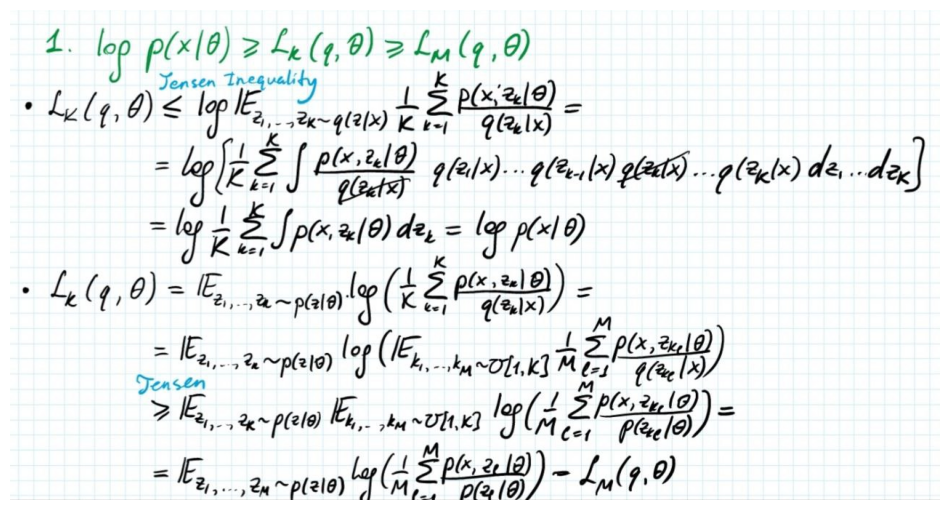

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-2-1-1.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

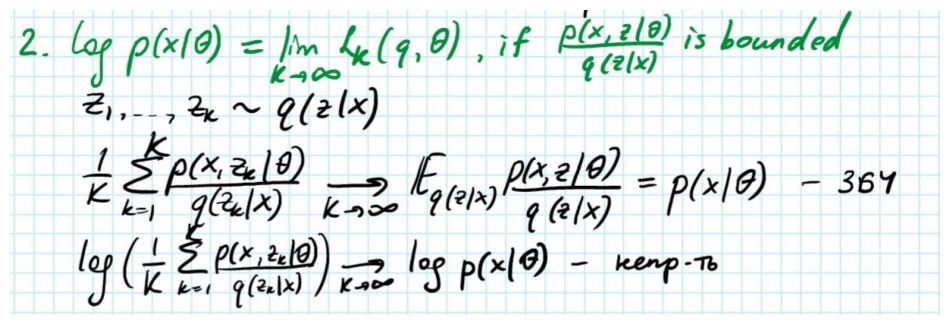

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-2-1-2.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

### Problem 2: EM-algorithm for GMM (4pt)

**Do not worry:** the task is long-written, but it is very useful for the understanding of the EM-algorithm and it is not very hard :)

Recall the Gaussian Mixture Model (GMM) we discussed in Seminar 3:

- model parameters $\boldsymbol{\theta} = \{ \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \boldsymbol{\Sigma}_{1:K} \}$;

- prior distribution (note that here it also depends on $\boldsymbol{\theta}$) $p(z | \boldsymbol{\theta}) = \text{Categorical}(\pi_1, \dots \pi_K)$;

- generative distribution $p(\mathbf{x} | z, \boldsymbol{\theta}) = \mathcal{N}\left(\mathbf{x}|, \boldsymbol{\mu}_z, \boldsymbol{\Sigma}_z\right)$.

Given samples $\mathbf{X} = \{\mathbf{x}_1, \dots, \mathbf{x}_n\} \sim p(\mathbf{x})$ , $\mathbf{x}_i \in \mathbb{R}^m$ we want to fit GMM model via **MLE**:

$$
\boldsymbol{\theta}^{*} = \arg\max\limits_{\boldsymbol{\theta}} \log p(\mathbf{X} | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}}\sum\limits_{i = 1}^{n} \log \left(\sum\limits_{k = 1}^{K}  \pi_k \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right).
$$

The direct solution of the problem above is hard and we substitute **MLE** optimization with **ELBO** optimization:

$$
\boldsymbol{\theta}^{\#} = \arg\max\limits_{q, \boldsymbol{\theta}} \mathcal{L}(q, \boldsymbol{\theta}) = \arg\max\limits_{q, \boldsymbol{\theta}} \int\limits_{Z^n} q(z_1, \dots, z_n) \log\frac{ p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) }{ q(z_1, \dots, z_n) } \prod\limits_{i = 1}^{n} d z_i.
$$

Since the pairs $(\mathbf{x}_1, z_1), \dots ,(\mathbf{x}_N, z_n)$ are mutually independent, the distributions could be factorized:
$$
    q(z_1, \dots, z_n) = \prod_{i=1}^n q(z_i); \quad p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) = \prod_{i=1}^n p(\mathbf{x}_i, z_i | \boldsymbol{\theta}).
$$
$$
\mathcal{L}(q, \boldsymbol{\theta}) = \sum\limits_{i = 1}^{n} \int\limits_{Z} q(z_i) \log\frac{ p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) }{ q(z_i) } d z_i.
$$

In the equations above we treet $q(\cdot)$ as continuous density function. In our case $q(\cdot)$ is discrete categorical distribution and all integrals are substituted with the corresponding sums:

$$
\int\limits_{Z} f(z) q(z) dz \longrightarrow \sum\limits_{k = 1}^{K} f(k) q(\{z = k\}).
$$

**ELBO** optimization could be done via EM-algorithm:

#### EM-algorithm

* **E-step**

    $$
    q(z_i) = p(z_i | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}).
    $$
    
    Note, that $q(z_i)$ is a categorical distribution over $K$ components: $q(z_i) = \text{Categorical}(\xi_1^i, \xi_2^i, \dots, \xi_K^i)$.

* **M-step**

    \begin{align}
    \boldsymbol{\theta}^{\text{new}} &= \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} E_{z_i \sim q(z_i)} \log p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) \\
    &= \arg\max\limits_{\boldsymbol{\theta}}  \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}).
    \end{align}
    
#### E- and M- steps derivations
    
Recall the derivation of **E-step** from the class:

$$
q(\{z_i = k\}) = \xi_k^i = p(\{z = k\} | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}) \overset{\text{Bayes theorem}}{=} \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum\limits_{k' = 1}^{K} \pi_{k'} \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_{k'}, \boldsymbol{\Sigma}_{k'})}.
$$

**M-step** is a bit harder. Let's denote

$$
\Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) := \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}) =\\= \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \left(\log \pi_k - \frac{m}{2} \log 2 \pi - \frac{1}{2} \log \det \boldsymbol{\Sigma}_k - \frac{1}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k)\right).
$$

Let's maximize $\Phi(\cdot)$ with respect to parameters $\boldsymbol{\pi}_{1:K}$, $\boldsymbol{\mu}_{1:K}$, $\boldsymbol{\Sigma}_{1:K}$ separately:

1. Maximization with respect to $\boldsymbol{\pi}_{1:K}$:
$$
\arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \log \pi_k = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{k = 1}^{K} \log \left(\pi_k \right) \sum\limits_{i = 1}^{n} \xi_k^i.
$$

    **Subproblem 3.1 (1.5pt):** Prove, that the $\arg\max$ problem above has solution $\pi_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \xi_k^i}{n}$, $k \in 1, 2, \dots K$.
    
2. Maximization with respect to $\boldsymbol{\mu}_{1:K}$. Let's take the derivative:
$$
\frac{\partial}{\partial \boldsymbol{\mu}_k} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \frac{\partial}{\partial \boldsymbol{\mu}_k} \sum\limits_{i = 1}^{n} - \frac{\xi_{k}^{i}}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k) = \sum\limits_{i = 1}^{n} \left(\boldsymbol{\Sigma}_k^{-1} \mathbf{x}_i - \boldsymbol{\Sigma}_k^{-1} \boldsymbol{\mu}_k\right) \xi_k^i = \boldsymbol{\Sigma}_k^{-1} \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0.
$$

    Since $\boldsymbol{\Sigma}_k^{-1}$ is positive definite, the equation above could be written as follows:
    
$$
\sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0 \quad \Rightarrow \quad \boldsymbol{\mu}_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \mathbf{x}_i \xi_k^i}{\sum\limits_{i = 1}^{n} \xi_k^i}.
$$
    
3. Maximization with respect to $\boldsymbol{\Sigma}_{1:K}$.

    **Subproblem 3.2 (1.5pt):** Prove, that  
$$
\boldsymbol{\Sigma}^{\text{new}}_k = \frac{1}{\sum\limits_{i = 1}^{n} \xi_k^i} \sum\limits_{i = 1}^{n} \xi_{k}^{i} \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right) \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right)^T.
$$

*Hint 1*: $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.

*Hint 2*: $\frac{\partial}{\partial \mathbf{A}} \mathbf{x}^T \mathbf{A}^{-1} \mathbf{y} = - (\mathbf{A}^{-1})^T \mathbf{x} \mathbf{y}^T (\mathbf{A}^{-1})^T$.

*General Hint*: there is a nice book that helps in working with matrices [matrixcookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf).

**Subproblem 3.3:** Prove, that $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.

*Hint*: Recall the notion of *cofactor* or *adjunct* (алгебраическое дополнение) ([wiki_en](https://en.wikipedia.org/wiki/Minor_(linear_algebra)), [wiki_ru](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)) from Linear Algebra courses.

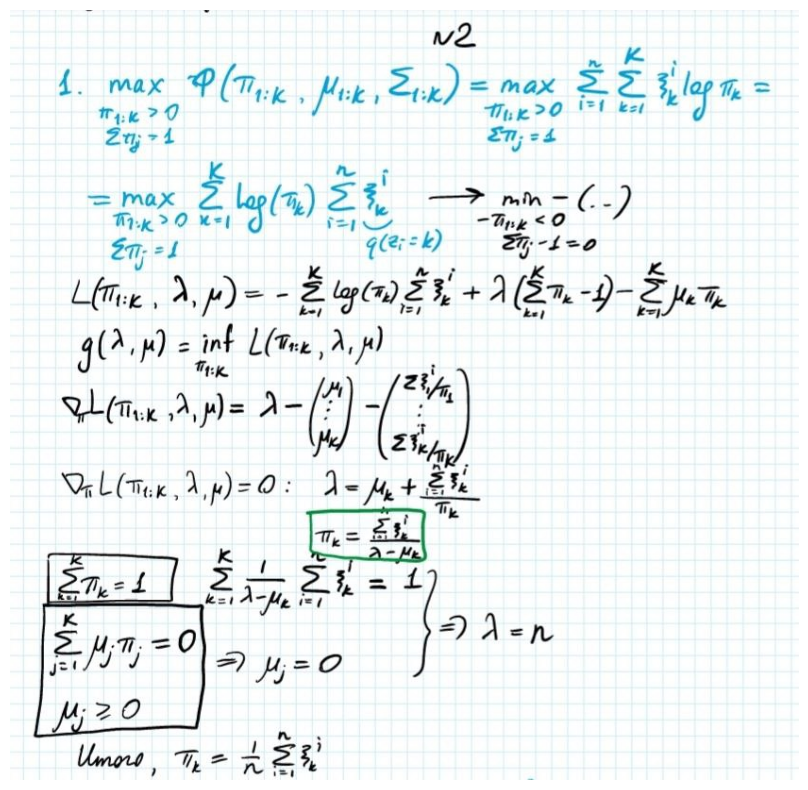

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-2-2-1.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

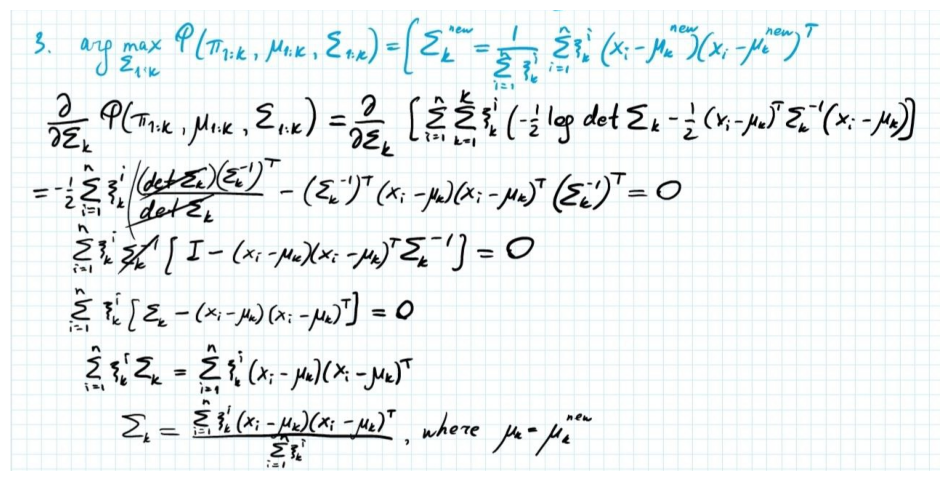

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-2-2-2.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

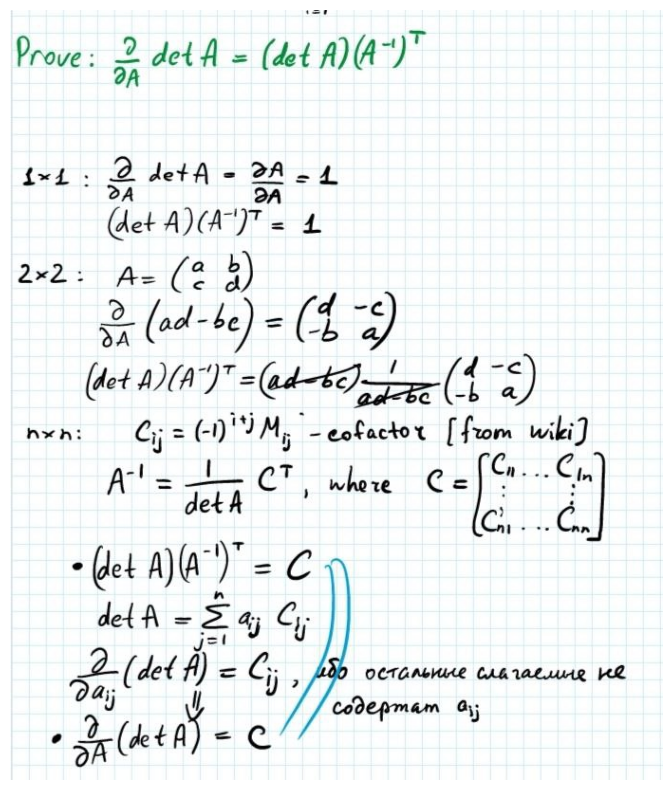

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-2-2-3.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

```
your solution
```

In [1]:
REPO_NAME = "2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2023-DGM-MIPT-course'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 602 (delta 27), reused 26 (delta 25), pack-reused 570
Receiving objects: 100% (602/602), 232.51 MiB | 32.15 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Updating files: 100% (271/271), done.
Processing ./2023-DGM-MIPT-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=4010 sha256=1bbada0ddeed624727498d727f45a29dbc12349b03807ff771546a76a08ad725
  Stored in directory: /tmp/pip-ephem-wheel-cache-52iqbi21/wheels/d7/24/b0/17b69ee697654689a9a78e4d6d52c72d6c09e07ac2e47017ad
Successfully built dgm-utils


In [2]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import show_samples, visualize_images, load_dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

## Task 2: VAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset.

Let download and visualize samples from the dataset.

100%|██████████| 170498071/170498071 [00:03<00:00, 44371649.11it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


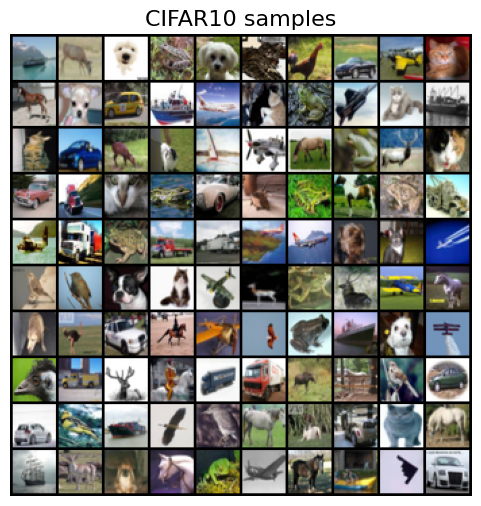

In [4]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Now it is time to define our model. Our model will have the following structure:

* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. We will assume that covariance matrice $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ is diagonal.
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ (means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$) as model samples.
* Our encoder and decoder will be convolutional neural networks.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. It a standard heuristics that allows to get more accurate model. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.


To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, \mathbf{I})$.

Let start with the helper functions.

In [5]:
def get_normal_KL(
    mean_1: torch.Tensor,
    log_std_1: torch.Tensor,
    mean_2: Optional[torch.Tensor] = None,
    log_std_2: Optional[torch.Tensor] = None,
) -> torch.Tensor:
    """
    :Parameters:
    mean_1: means of normal distributions (1)
    log_std_1 : standard deviations of normal distributions (1)
    mean_2: means of normal distributions (2)
    log_std_2 : standard deviations of normal distributions (2)
    :Outputs:
    kl divergence of the normal distributions (1) and normal distributions (2)
    ---
    This function should return the value of KL(p1 || p2),
    where p1 = Normal(mean_1, exp(log_std_1) ** 2), p2 = Normal(mean_2, exp(log_std_2) ** 2).
    If mean_2 and log_std_2 are None values, we will use standard normal distribution.
    Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    assert mean_1.shape == log_std_1.shape == mean_2.shape == log_std_2.shape

    std_1 = torch.exp(log_std_1)
    std_2 = torch.exp(log_std_2)

    kl = log_std_2 - log_std_1 + (std_1 ** 2 + (mean_1 - mean_2) ** 2) / (2 * std_2 ** 2) - 0.5

    return kl


def test_KL():
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)
        ).numpy(),
        200.2144,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)
        ).numpy(),
        1.50925,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_KL(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        [49.2990, 1498.479],
        rtol=1e-3,
    )


test_KL()

In [6]:
def get_normal_nll(
    x: torch.Tensor, mean: torch.Tensor, log_std: torch.Tensor
) -> torch.Tensor:
    """
    This function should return the negative log likelihood log p(x),
    where p(x) = Normal(x | mean, exp(log_std) ** 2).
    Note that we consider the case of diagonal covariance matrix.
    """
    std = torch.exp(log_std)
    nll = 0.5 * ((x - mean) / std).pow(2) + log_std + 0.5 * torch.log(2 * torch.tensor([torch.pi], device=x.device))

    return nll


def test_NLL():
    assert np.isclose(
        get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(),
        3.9189,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(),
        6.9191,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_nll(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        np.array([3.9982, 5.9197]),
        rtol=1e-3,
    )


test_NLL()

Let define our convolutional encoder and decoder.

In [7]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape: tuple, n_latent: int) -> None:
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture
        self.conv1 = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        # Fully connected layer for mean and log_std
        self.fc = nn.Linear(256 * 4, 2 * n_latent)
        # ====

    def forward(self, x: torch.Tensor) -> tuple:
        x = self.conv4(self.conv3(self.conv2(self.conv1(x))))
        x = x.view(x.size(0), -1)

        out = self.fc(x)
        mu, log_std = torch.chunk(out, 2, dim=1)

        return mu, log_std


class ConvDecoder(nn.Module):
    def __init__(self, n_latent: int, output_shape: tuple) -> None:
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        self.base_size = (256, output_shape[1] // 16, output_shape[2] // 16)
        # ====
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        self.fc = nn.Linear(n_latent, 256 * 4)

        self.deconv1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.deconv2 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.deconv3 = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.deconv4 = nn.Sequential(
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),
        )

        # ====

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        # ====
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor
        # 3) apply conv layers

        # ====
        x = self.fc(z)
        x = x.view(x.size(0), *self.base_size)
        out = self.deconv4(self.deconv3(self.deconv2(self.deconv1(x))))

        return out


def test_conv_models():
    test_enc = ConvEncoder((3, 32, 32), n_latent=10)
    inp = torch.randn((4, 3, 32, 32))
    mu, std = test_enc(inp)

    assert list(mu.shape) == [4, 10]
    assert list(std.shape) == [4, 10]

    test_dec = ConvDecoder(10, (3, 32, 32))
    inp = torch.randn(4, 10)
    assert list(test_dec(inp).shape) == [4, 3, 32, 32]


test_conv_models()

Now it is time to implement VAE model for image dataset.

In [8]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape: tuple, n_latent: int, beta: float = 1) -> None:
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta

        self.init_submodels()

    def init_submodels(self):
        # ====
        # define encoder with input size input_shape and output dim n_latent
        # define decoder with input dim n_latent and output size input_shape
        self.encoder = ConvEncoder(self.input_shape, self.n_latent)
        self.decoder = ConvDecoder(self.n_latent, self.input_shape)
        # ====

    @property
    def device(self):
        return next(self.parameters()).device

    def prior(self, n: int) -> torch.Tensor:
        # return n samples from prior distribution (we use standart normal for prior)
        z = torch.randn(n, self.n_latent, device=self.device)
        z = z.to(self.device)
        return z

    def forward(self, x: torch.Tensor) -> tuple:
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        mu_z, log_std_z = self.encoder(x)
        z = mu_z + torch.exp(log_std_z) * self.prior(x.size(0))
        x_recon = self.decoder(z)

        return mu_z, log_std_z, x_recon

    def loss(self, x: torch.Tensor) -> dict:
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)
        mu_z, log_std_z, x_recon = self.forward(x)

        recon_loss = get_normal_nll(x, x_recon, log_std=torch.zeros_like(x_recon)).mean()
        kl_loss = get_normal_KL(mu_z, log_std_z).mean()
        elbo_loss = recon_loss + self.beta * kl_loss

        return {
            "elbo_loss": elbo_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            z_samples = self.prior(n)
            x_recon = self.decoder(z_samples)
            samples = torch.clamp(x_recon, -1, 1)

        return samples.cpu().numpy() * 0.5 + 0.5

  0%|          | 0/16 [00:00<?, ?it/s]

elbo_loss: 0.9715
recon_loss: 0.9575
kl_loss: 0.0702


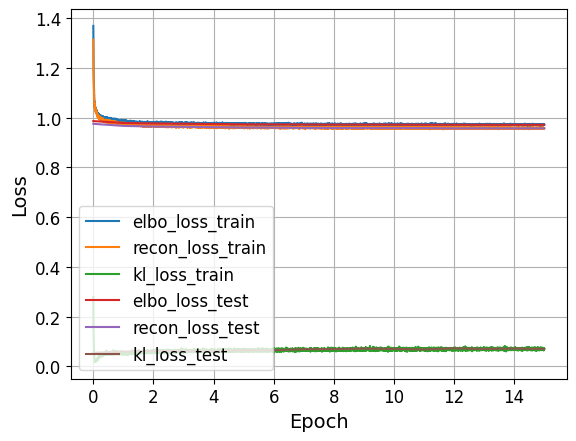

In [ ]:
# ====
# choose these parameters

BATCH_SIZE = 128  # any adequate value
EPOCHS = 16      # < 16
LR = 5e-4          # < 1e-3
N_LATENS = 256    # 128 < _ < 1024
BETA = 0.2        # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    loss_key="elbo_loss",
    use_tqdm=True,
    use_cuda=USE_CUDA,
)
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

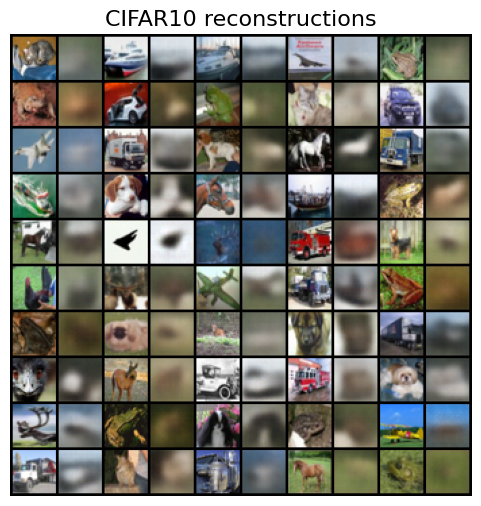

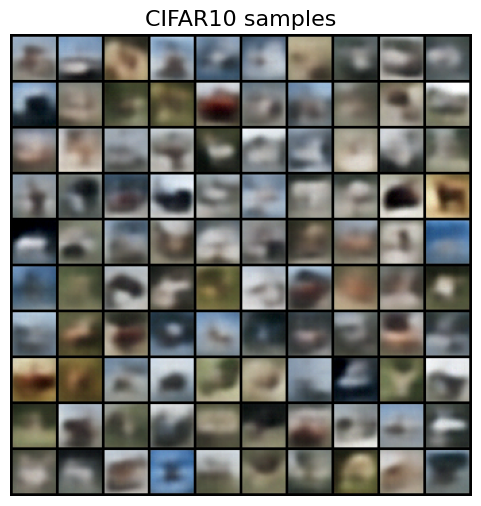

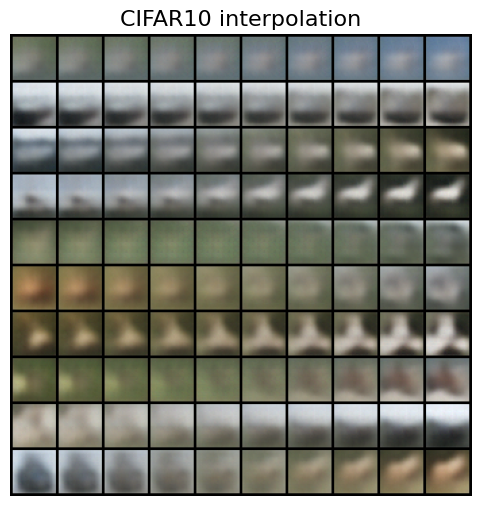

In [ ]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [
        model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)
    ]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, "CIFAR10 reconstructions")
show_samples(samples, "CIFAR10 samples")
show_samples(interps, "CIFAR10 interpolation")

## Task 3: ResNetVAE on CIFAR10 data (4pt)

Now we will try to make our architecture more powerful. Let try to use ResNet-like encoder and decoder.

First of all let define basic ResNet block. It will be the basic block for our encoder.

In [9]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # here you could try different network structures
        # we suggest to use the following:
        # residual(x) = conv(bn(relu(conv(bn(x)))))
        # output = relu(conv1x1(input) + residual(input))
        self.seq = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=(kernel_size-1)//2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels)
        )
        self.relu2 = nn.ReLU()

        # If the input and output dimensions don't match, use a 1x1 convolution
        self.alignment_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        # ====

    def forward(self, x):
        sequential_part = self.seq(x)
        residual_part = self.alignment_layer(x)
        result = sequential_part + residual_part

        if self.final_relu:
            result = self.relu2(result)
        return result


def test_resnet_block():
    test_inp = torch.randn(5, 64, 128, 128)

    for out_channels in [64, 128]:
        for kernel_size in [3, 5, 7]:
            for stride in [1, 2, 4]:
                resnet_block = ResNetBlock(in_channels=64, out_channels=out_channels,
                                        kernel_size=kernel_size, stride=stride)
                assert list(resnet_block(test_inp).shape) == [5, out_channels, 128 // stride, 128 // stride]


test_resnet_block()

Now let define basic ResNet block. It will be the basic block for our decoder.

In [10]:
class ResNetTransposeBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # here you could try different network structures
        # we suggest to use the following:
        # output = conv(bn(f(input))) + f(input), where:
        # f(x) = upconv(bn(x))
        padding = (kernel_size - stride) // 2
        self.up_conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding=padding, output_padding=0),
            nn.BatchNorm2d(out_channels),
        )
        self.conv = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
        )
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        # ====

    def forward(self, x):
        out_upconv = self.up_conv(x)
        out_conv = self.conv(self.relu1(out_upconv))

        result = out_upconv + out_conv

        if self.final_relu:
            result = self.relu2(result)

        return result


def test_resnet_transposed_block():
    test_inp = torch.randn(5, 64, 64, 64)
    for out_channels in [64, 128]:
        for kernel_size in [4, 6, 8]:
            for stride in [2, 4]:
                resnet_block = ResNetTransposeBlock(
                    in_channels=64, out_channels=out_channels, kernel_size=kernel_size, stride=stride)
                assert list(resnet_block(test_inp).shape) == [5, out_channels, 64 * stride, 64 * stride]


test_resnet_transposed_block()

Now we are to define our encoder and decoder.

In [11]:
class ConvResNetEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent

        self.resnet_blocks = nn.Sequential(
            ResNetBlock(input_shape[0], 64, kernel_size=3, stride=2),
            ResNetBlock(64, 128, kernel_size=3, stride=2),
            ResNetBlock(128, 256, kernel_size=3, stride=2),
            ResNetBlock(256, 512, kernel_size=3, stride=2),
        )

        # Flatten and Linear layer
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512 * 4, 2 * n_latent)

    def forward(self, x):
        # ====
        # apply all blocks defined in init
        # split output tensor to mu and log_std
        # ====
        x = self.resnet_blocks(x)
        x = self.flatten(x)
        out = self.fc(x)
        mu, log_std = torch.chunk(out, 2, dim=1)

        return mu, log_std


class ConvResNetDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape
        # ====
        # our suggestions:
        # - apply linear layer to the input
        # - reshape output matrix to 4-dims tensor
        # - try to combine multiple resnet transposed blocks
        # ====
        self.fc = nn.Linear(n_latent, 512 * 4)

        # Define ResNet transpose blocks here
        self.resnet_transpose_blocks = nn.Sequential(
            ResNetTransposeBlock(512, 256, kernel_size=4, stride=2),
            ResNetTransposeBlock(256, 128, kernel_size=4, stride=2),
            ResNetTransposeBlock(128, 64, kernel_size=4, stride=2),
            ResNetTransposeBlock(64, output_shape[0], kernel_size=4, stride=2, final_relu=False),
        )

    def forward(self, z):
        # ====
        # apply all blocks defined in init
        # ====
        z = self.fc(z)
        z = z.view(-1, 512, 2, 2)
        out = self.resnet_transpose_blocks(z)
        return out


def test_resnet_models():
    test_enc = ConvResNetEncoder((3, 32, 32), n_latent=10)
    inp = torch.randn((4, 3, 32, 32))
    mu, std = test_enc(inp)

    assert list(mu.shape) == [4, 10]
    assert list(std.shape) == [4, 10]

    test_dec = ConvResNetDecoder(10, (3, 32, 32))
    inp = torch.randn(4, 10)
    assert list(test_dec(inp).shape) == [4, 3, 32, 32]


test_resnet_models()

Our new VAE model will be almost the same as the previous one.

In [12]:
class ConvResNetVAE(ConvVAE):
    def init_submodels(self):
        # Define the encoder and decoder
        self.encoder = ConvResNetEncoder(self.input_shape, self.n_latent)
        self.decoder = ConvResNetDecoder(self.n_latent, self.input_shape)

That is all! We are ready to train our model.

  0%|          | 0/16 [00:00<?, ?it/s]

elbo_loss: 0.9807
recon_loss: 0.9706
kl_loss: 0.0509


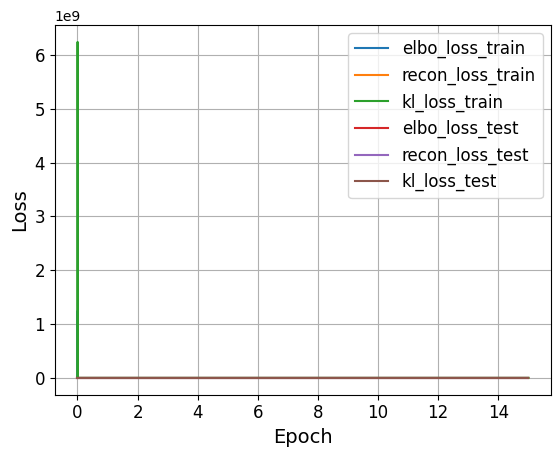

In [13]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 128  # any adequate value
EPOCHS = 16      # < 16
LR = 7e-4          # < 1e-3
N_LATENS = 256    # 128 < _ < 1024
BETA = 0.2        # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvResNetVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    loss_key="elbo_loss",
    use_tqdm=True,
    use_cuda=USE_CUDA,
)
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Let visualize model samples.

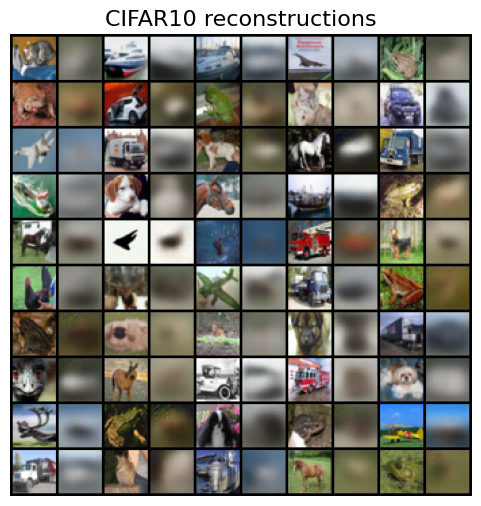

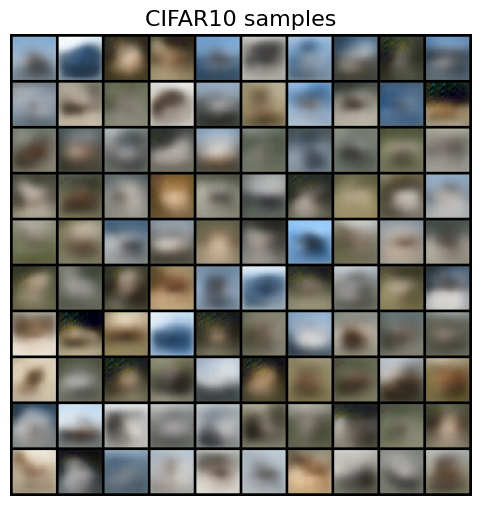

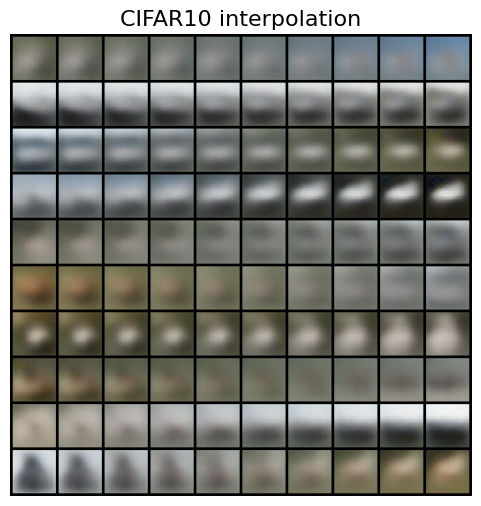

In [14]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')

Try to compare values of losses and samples for ConvVAE and ConvResNetVAE.